In [2]:
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')


yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### 2. Alarming Deaths at Clinic

In [3]:
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[['year', 'births', 'deaths','proportion_deaths']][yearly['clinic'] == 'clinic 1']
yearly2 = yearly[['year', 'births', 'deaths','proportion_deaths']][yearly['clinic'] == 'clinic 2']

# Print out yearly1
yearly1

,year,births,deaths,proportion_deaths
0,1841,3036,237,0.078063
1,1842,3287,518,0.157591
2,1843,3060,274,0.089542
3,1844,3157,260,0.082357
4,1845,3492,241,0.069015
5,1846,4010,459,0.114464


## 3. Deaths at the clinics

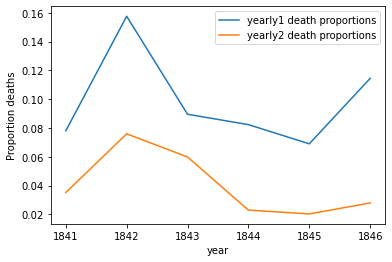

In [4]:
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x = 'year', y = 'proportion_deaths', label = 'yearly1 death proportions', kind = 'line')
ax.set_ylabel("Proportion deaths")
yearly2.plot(x = 'year', y = 'proportion_deaths', label = 'yearly2 death proportions', ax = ax, kind = 'line')

### 4. Beginning of Handwashing

In [6]:
monthly = pd.read_csv('monthly_deaths.csv',parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### 5. Effect of Handwashing

Text(0, 0.5, 'Proportion deaths')

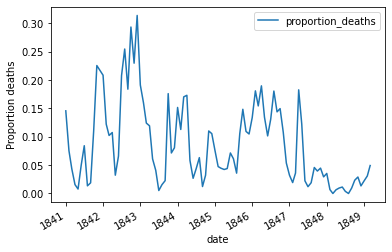

In [7]:
ax = monthly.plot(x = 'date', y = 'proportion_deaths')
ax.set_ylabel("Proportion deaths")

### 6. Effect of Handwashing Highlighted

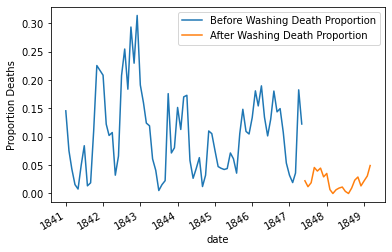

In [8]:
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x = 'date', y = 'proportion_deaths', label = 'Before Washing Death Proportion')
ax.set_ylabel("Proportion Deaths")
after_washing.plot(x = 'date', y = 'proportion_deaths', label = 'After Washing Death Proportion', ax = ax)

### 7. More Handwashing, fewer deaths?

In [9]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

### Bootstrap Analysis

In [10]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac = 1, replace = True)
    boot_after = after_proportion.sample(frac = 1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100826
0.975   -0.066817
dtype: float64

In [11]:
doctors_should_wash_their_hands = True